# __TITLE TK__
## Using Neural Networks to and Reddit Comments to Predict Movie Ratings

Flatiron School Data Science: Capstone Project

- **Author**: Zaid Shoorbajee
- **Instructor**: Morgan Jones
- **Pace**: Flex, 40 weeks

# **IMAGE TK TK TK**

## Business Understanding <a name="biz"></a>

A movie studio, Cinedistance, wants to know how well its movies will be received by audiences before it releases them. After all the hard work of producing a big-budget movie, there are still many decisions about the marketing and release of the movie. How much should the studio invest in marketing? Should it release it to a streaming or theaters? To make these decisions, it's helpful to know how much audiences will actually like the movie first.

Cinedistance wants to get qualitative comments from average moviegoers *before* a movie's official release. It is also employing a data scientist to use these comments to predict a rating for the movie, like an IMDb score. It's piloting a program where the movie is released to a focus group of about 100 average moviegoers. These viewers are asked to sign an NDA, watch the movie, and submit their thoughts about the movie as if they are commenting on an internet comment section.

The task of the data scientist is to apply natural language processing (NLP) and machine learning (ML) to the focus group's comments in order to predict a movie's IMDb score. These qualitative comments and predicted score can inform Cinedistance's decision-making about the movie's marketing, release. The studio may decide to do re-shoots, re-edits, or even [kill the movie](https://variety.com/2022/film/news/batgirl-not-released-warner-bros-hbo-max-1235331897/).

<!-- An international news outlet, *The Flatiron Post*, wants to be able to report on stories of crises and natural disasters in a prompt manner. News about plane crashes, hurricanes, earthquakes, terrorist threats, and other topics occurs without warning. Being late to the story can mean not only losing to the competition, but also leaving your audience in the dark while speculation runs amok. 

The *Post* wants to tap into Twitter as a resource in order to detect such disasters in real time, and it’s employing a data scientist for the task. Twitter is a fire hose of information; there is a lot more noise than signal, and reporters would waste a lot of time staring at their Twitter feeds just waiting for disaster tweets. But chances are that if a disaster is occurring, someone is tweeting about it. 

The task of the data scientist is to use natural language processing (NLP) and machine learning in order to systematically tell if a tweet is about a real disaster or not. Such tweets can then theoretically be presented to the newsroom in a separate feed. Reporters can then choose to pursue that story or not. -->

## Data Understanding <a name="data_understanding"></a>

### Dataset <a name="dataset"></a>

Movie fans do do the type of commentary that Cinedistance is looking for everyday in places like the [Reddit community r/movies](reddit.com/r/movies). On **r/movies**, Reddit users share news and opinions about movies. Additionally, for most major movies that come out, the subreddit hosts an official discussion of the movie. These official discussions contains text data that can be the basis to train an ML model to predict IMDb scores.

Reddit has an API that allows developers to scrape such information. The [PRAW library](https://praw.readthedocs.io/) simplifies this, acting as a wrapper for the API. Using PRAW, I scraped from r/movies the **highest-voted 100 comments of as many official movie discussions still indexed on Reddit**. Some discussions had fewer than 100 comments. I also downloaded [freely available ratings  data from IMDb](https://www.imdb.com/interfaces/) and matched scores to r/movies discussions.

 The resulting dataset contains:
* 922 movies
* 70,693 comments
* Movie title
* Reddit post ID and IMDB ID
* Reddit discussion date
* IMDb average rating
* Number of IMDb votes
* Movie runtimes
* Genres

### NLP <a name="nlp"></a>

The core type of data being used for this task is the text of Reddit comments. This is **unstructured data** and requires natural language processing (NLP) techniques in order to be interpretable by a machine learning model, such as a deep neural network. ........ ........ ........

<!-- The core type of data being used for this task is the text of tweets. This is **unstructured data** and requires natural language processing (NLP) techniques in order to be interpretable by a machine learning model, such as a neural network.

Working with natural langauge is messy; disaster and non-disaster tweets can use many of the same words, but context changes everything. The following two tweets both have the words "explosion" and "fire" in them. For any literate person, it's obvious which is about a real disaster and which is not.

[<img src="./images/example_tweet_1.png" alt="Tweet about a literal explosion" width=55%>](https://twitter.com/BNONews/status/1549444981408022528)
<br>
[<img src="./images/example_tweet_0.png" alt="Tweet about an explosion of flavor" width=55%>](https://twitter.com/BNONews/status/1549444981408022528)
<br>
For a computer, however, it's not so simple. To make tweets interpretable by a neural network, this project uses the following NLP techniques:

* Tokenization
* Lemmatization
* Removing stop words
* TF-IDF Vectorization
* Part-of-speech tagging
* Named-entity recognition
* Meta-feature extraction
    * Character count, word count, stop word rate, etc.

The idea is that converting tweets into the signals listed above should help a machine learning model to discern the difference between a disaster tweet and non-disaster tweet using hidden patterns.

### Dataset <a name="dataset"></a>

This project uses the [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started) dataset from Kaggle. This is a dataset recommended by Kaggle for those looking to get started with NLP.

The labeled training set contains **7,613** entries with the following features:
* **id:** Arbitrary identifier
* **keyword:** Search phrase used to collect tweet
* **location:** User-generated location for the tweet's account
* **text:** The text of the tweet
* **target:** Binary label for disaster (1) and non-disaster (0) tweets. Labeled by humans. -->

## Modeling

This project ultimately is a binary classification task. I will be using [TensorFlow through the Keras interface](https://www.tensorflow.org/api_docs/python/tf/keras) in order to build a neural network. The neural network will be trained on a preprocessed version of the disaster tweets dataset (which I will prepare in this notebook).

## Scoring and Evaluation

The business case is that a news outlet wants to make sure it doesn't miss important crises that should be reported on. Therefore, it's important to know what level of false negatives the model produces, which is aptly measured by the **recall score:**

recall = (true positives) / (false negatives + true positives)

In [1]:
import time
start_time = time.time()
def time_check(start=None):
    if start:
        t = time.time() - start
    else:
        t = time.time() - start_time
    print(f'Time check: {t//60:.0f} minutes and {t%60:.0f} seconds')

In [2]:
# Imports

import numpy as np
import pandas as pd
import warnings
import datetime

from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
from spacy import displacy

from scipy.stats import pearsonr, spearmanr, kendalltau

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.random import set_seed
from tensorflow_addons.metrics import RSquare

import re
from collections import OrderedDict
import itertools
import string

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import praw

import json

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 100
seed = 55
np.random.seed(seed)

## Data Preparation

The dataset used in this notebook was compiled by me in several other notebooks. See the [compile_and_filter_dataset](./compile_and_filter_dataset/) folder in this repository for the detailed process of how the data was collected.

### Read in final dataset, containing reddit comments and IMDb scores.

In [3]:
df = pd.read_csv('./data/data_final.csv')

In [4]:
df.head()

,id,tconst,title,originalTitle,comments,runtimeMinutes,startYear,post_date_utc,post_year,post_month,post_day,genres,numVotes,averageRating
0,vzcwal,tt13406136,the princess,The Princess,Joey King needs a new agent. She’s proven she has talent but she has so many terrible films on h...,94.0,2022,1.657851e+09,2022,7,14,"Action,Drama,Fantasy",11474,5.6
1,vzcwal,tt13406136,the princess,The Princess,"Silly, but entertaining and non stop action",94.0,2022,1.657851e+09,2022,7,14,"Action,Drama,Fantasy",11474,5.6
2,vzcwal,tt13406136,the princess,The Princess,"The yassification of The Raid\n\nActually, this was fun enough and mad respect to Joey King for ...",94.0,2022,1.657851e+09,2022,7,14,"Action,Drama,Fantasy",11474,5.6
3,vzcwal,tt13406136,the princess,The Princess,"Honestly, this was pretty fun. The plot is nothing special yes.\n\nBut Joey King was actually e...",94.0,2022,1.657851e+09,2022,7,14,"Action,Drama,Fantasy",11474,5.6
4,vzcwal,tt13406136,the princess,The Princess,"Man, I loved this movie. Yeah, it was campy, but whatever. The premise worked for me, I liked th...",94.0,2022,1.657851e+09,2022,7,14,"Action,Drama,Fantasy",11474,5.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              70692 non-null  object 
 1   tconst          70692 non-null  object 
 2   title           70692 non-null  object 
 3   originalTitle   70692 non-null  object 
 4   comments        70692 non-null  object 
 5   runtimeMinutes  70692 non-null  float64
 6   startYear       70692 non-null  int64  
 7   post_date_utc   70692 non-null  float64
 8   post_year       70692 non-null  int64  
 9   post_month      70692 non-null  int64  
 10  post_day        70692 non-null  int64  
 11  genres          70621 non-null  object 
 12  numVotes        70692 non-null  int64  
 13  averageRating   70692 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 7.6+ MB


### "Imploding" the dataframe

Currently, each comment is its own row, giving the dataset over 70,000 rows.

In reality, each of these comments corresponds to one of about 900 movies.

That's how I'm going to be dealing with this data from now own, so I will compress all the comments into lists.

In [6]:
comments_imploded = df.groupby('id')['comments'].agg(list)

In [7]:
df = df.drop_duplicates(subset='id').drop(columns=['comments'])
df = df.join(comments_imploded, on='id')
df ['n_comments'] = df['comments'].apply(len)
df.head()

,id,tconst,title,originalTitle,runtimeMinutes,startYear,post_date_utc,post_year,post_month,post_day,genres,numVotes,averageRating,comments,n_comments
0,vzcwal,tt13406136,the princess,The Princess,94.0,2022,1.657851e+09,2022,7,14,"Action,Drama,Fantasy",11474,5.6,[Joey King needs a new agent. She’s proven she has talent but she has so many terrible films on ...,21
21,vzcw0a,tt11671006,the man from toronto,The Man from Toronto,110.0,2022,1.657851e+09,2022,7,14,"Action,Adventure,Comedy",43386,5.8,[ O offence to Woody but I feel like the original casting of Jason Statham would have at least i...,23
44,vzcvsd,tt9288046,the sea beast,The Sea Beast,115.0,2022,1.657851e+09,2022,7,14,"Adventure,Animation,Comedy",35834,7.1,[Absolutely crazy that Netflix dropped this and also The Mitchells Vs The Machines with almost n...,77
121,vzcvkz,tt5151570,mrs harris goes to paris,Mrs. Harris Goes to Paris,115.0,2022,1.657851e+09,2022,7,14,"Comedy,Drama",4798,7.1,"[This was so cute it just made me smile the whole time. Highly recommend., The only word for th...",22
143,vzcv66,tt9411972,where the crawdads sing,Where the Crawdads Sing,125.0,2022,1.657851e+09,2022,7,14,"Drama,Mystery,Thriller",28694,7.1,[I did enjoy her house representing the 2 different ways the men treated her . Tate was invited ...,93


Reducing the dataset to only *potentially* relevant features, although I may not use all.

In [8]:
df = df[[
    'id', 'tconst', 'title', 'averageRating', 'numVotes',
    'runtimeMinutes', 'genres', 'comments', 'n_comments'
    ]]

#### Missing Values

In [9]:
df.isna().sum()

id                0
tconst            0
title             0
averageRating     0
numVotes          0
runtimeMinutes    0
genres            1
comments          0
n_comments        0
dtype: int64

The only feature with a missing values is `genre`.

In [10]:
df[df['genres'].isna()]

,id,tconst,title,averageRating,numVotes,runtimeMinutes,genres,comments,n_comments
2378,t0tapr,tt15374070,studio 666,5.7,7356,106.0,NaN,"[Scooby Foo, As “okay” as the film is, the chainsaw double kill was absolutely gnarly., There’s ...",71


I'm not sure why this wasn't in the dataset, but on IMDb's website, this movie's genres are comedy, horror, music.

In [11]:
df.loc[2378, 'genres'] = "Comedy,Horror,Music"

### Visualizing the distribution of the target variable `averageRating`

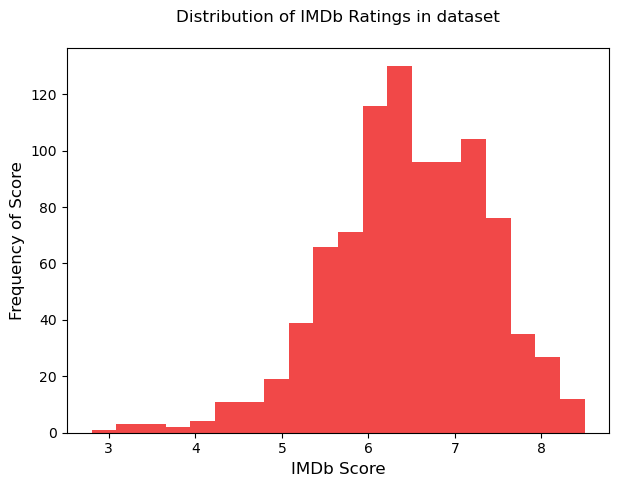

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
df['averageRating'].hist(ax=ax, color='#f14848', bins=20, grid=False)
ax.set_title('Distribution of IMDb Ratings in dataset\n')
ax.set_xlabel('IMDb Score', size=12),
ax.set_ylabel('Frequency of Score', size=12)
fig.set_facecolor('white')

In [13]:
df['averageRating'].describe()

count    922.000000
mean       6.471909
std        0.893870
min        2.800000
25%        6.000000
50%        6.500000
75%        7.100000
max        8.500000
Name: averageRating, dtype: float64

### Train-Test Split

In [14]:
features = df.drop(columns=['averageRating'])
target = df['averageRating']

X_train: Used for training the model and extracting meta-data about comments

X_val: Used for selecting a model

X_test: Used to score the final model

In [15]:
# Splitting the full dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=seed
)

# Splitting off a validation set

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=.5, random_state=seed
)

### Cleaning and tokenizing comments

In [16]:
def clean_comments(comments_list):
    
    # Make everything lowercase
    cleaned = [comment.lower() for comment in comments_list]

    # Replace URLs with "HYPERLINK"
    cleaned = [re.sub(pattern=r'http\S+', repl='HYPERLINK', string=comment) for comment in cleaned]

    # Remove excessive white space and newlines
    cleaned = [comment.replace("\n", " ") for comment in cleaned]
    cleaned = [re.sub(pattern=r' {2,}', repl=' ', string=comment) for comment in cleaned]

    # Ensure apostrophes and quotation marks are consistent
    cleaned = [re.sub(r"’|‘", repl="'", string=comment) for comment in cleaned]
    cleaned = [re.sub(r"“|”", repl='"', string=comment) for comment in cleaned]
    
    return cleaned

In [17]:
X_train['comments'] = X_train['comments'].apply(clean_comments)

In [18]:
# Preview 

X_train.sample(5)['comments']

53296    ["luke skywalker projecting a force ghost across the galaxy to fuck with kylo ren" is the level ...
38838    [oh no bryson look out! oh my god, he's got airpods in, he can't hear us! oh fuck!, the pacing o...
6652     [this is a great example of a straightforward, formulaic movie elevated by \*excellent\* perform...
24543    [the sister's reaction to the email annoyed the shit out of me. you and your sister are supposed...
1473     ["what were you thinking" "you told me not to think!" fucking 10/10, very impressed with the way...
Name: comments, dtype: object

#### Why not remove punctuation?

Removing punctuation is a common step in cleaning text for NLP. I'm choosing not to yet since I plan to lemmatize words and extract part of speech tags. Doing so requires keeping grammatical context in the text, which would be lost if I removed punctuation at this point. The NLP library SpaCy treats punctuation as tokens, so I can simply treat punctuation as stop words.

#### Setting up a tokenizer with SpaCy

In [19]:
# Disabling certain components to keep it light

nlp = spacy.load(
    "en_core_web_sm",
    disable=[
        "ner", "textcat", "custom",
        "entity_linker", "entity_linker",
        "textcat_multilabel", "transformer"
    ]
    )

In [20]:
# List of comments to use an example
example_comments = X_train.loc[3957]['comments']
display(example_comments[:3])

["best gag: start of the riddler's vlog thanking his followers for commenting",
 'confirmed: the riddler is a reddit mod',
 'i can watch batman slowly walking to 4 piano notes all day']

In [21]:
# How Spacy's "nlp" object works:

print("Spacy Object:")
print(nlp.pipe(example_comments))
print()
print("The result is a list of docs. Each doc is a comment:")
print(list(nlp.pipe(example_comments))[0])
print(list(nlp.pipe(example_comments))[1])
print(list(nlp.pipe(example_comments))[2])
print()
print("Type:")
print(type((list(nlp.pipe(example_comments)))[0]))
print()
print("Tokens:")
print([t.text for t in list(nlp.pipe(example_comments))[0]])
print([t.text for t in list(nlp.pipe(example_comments))[1]])
print([t.text for t in list(nlp.pipe(example_comments))[2]])

Spacy Object:
<generator object Language.pipe at 0x000001C884AB5820>

The result is a list of docs. Each doc is a comment:
best gag: start of the riddler's vlog thanking his followers for commenting
confirmed: the riddler is a reddit mod
i can watch batman slowly walking to 4 piano notes all day

Type:
<class 'spacy.tokens.doc.Doc'>

Tokens:
['best', 'gag', ':', 'start', 'of', 'the', 'riddler', "'s", 'vlog', 'thanking', 'his', 'followers', 'for', 'commenting']
['confirmed', ':', 'the', 'riddler', 'is', 'a', 'reddit', 'mod']
['i', 'can', 'watch', 'batman', 'slowly', 'walking', 'to', '4', 'piano', 'notes', 'all', 'day']


The tokenizing process appears to work. It treats most punctuation as tokens, so I will likely add punctuation to my stop word list.

#### New column: Converting each reddit discussion into a list of SpaCy docs. Each doc is a comment.

In [22]:
# This cell can take over 7 minutes to run

X_train['spacy_comments'] = X_train['comments'].apply(lambda x: list(nlp.pipe(x)))

#### Tokenizing

#### I plan to make multiple tokenized versions of each comment.

* Basic version: Any word with at least two letters. Strips the symbols for hashtags (#) and mentions(@)
* Basic version, excluding stop words
* Lemmatized version of basic version
* Lemmatized version of basic version, exluding stop words.

In [23]:
def spacy_tokenize(list_of_docs):
    """
    Takes in a list of SpaCy documents.
    Converts them into one giant list of tokens as strings.    
    """
    tokens_by_doc = [[t.text for t in doc] for doc in list_of_docs]
    tokens_all_together = list(itertools.chain.from_iterable(tokens_by_doc))
    return tokens_all_together

In [24]:
X_train['tokens'] = X_train['spacy_comments'].apply(spacy_tokenize)

In [25]:
X_train.head()

,id,tconst,title,numVotes,runtimeMinutes,genres,comments,n_comments,spacy_comments,tokens
5057,s4a7gj,tt10095582,the tragedy of macbeth,33175,105.0,"Drama,Mystery,Thriller","[kathryn hunter playing all 3 witches and the old man was phenomenal, while i was lost some with...",96,"[(kathryn, hunter, playing, all, 3, witches, and, the, old, man, was, phenomenal), (while, i, wa...","[kathryn, hunter, playing, all, 3, witches, and, the, old, man, was, phenomenal, while, i, was, ..."
2183,u93jxh,tt11291274,the unbearable weight of massive talent,71143,107.0,"Action,Comedy,Crime",[nic cage and pedro pascal tripping balls and having an emotional crisis over an 8 ft wall will ...,97,"[(nic, cage, and, pedro, pascal, tripping, balls, and, having, an, emotional, crisis, over, an, ...","[nic, cage, and, pedro, pascal, tripping, balls, and, having, an, emotional, crisis, over, an, 8..."
40719,a5yk8k,tt7905466,they shall not grow old,34675,99.0,"Documentary,History,War","[biggest takeaway is the brit's will do just about anything to get their cup of tea. , >""they sh...",117,"[(biggest, takeaway, is, the, brit, 's, will, do, just, about, anything, to, get, their, cup, of...","[biggest, takeaway, is, the, brit, 's, will, do, just, about, anything, to, get, their, cup, of,..."
2044,ueb30t,tt12519030,hatching,6807,91.0,Horror,[the only monster in this movie was the bitch of a mother. i liked the character design of the e...,22,"[(the, only, monster, in, this, movie, was, the, bitch, of, a, mother, ., i, liked, the, charact...","[the, only, monster, in, this, movie, was, the, bitch, of, a, mother, ., i, liked, the, characte..."
67123,4ukw1u,tt4853102,batman: the killing joke,56967,76.0,"Action,Animation,Crime","[batman doing batgirl in cowgirl position is like something out of a bad porn parody. and sure, ...",97,"[(batman, doing, batgirl, in, cowgirl, position, is, like, something, out, of, a, bad, porn, par...","[batman, doing, batgirl, in, cowgirl, position, is, like, something, out, of, a, bad, porn, paro..."


In [26]:
time_check()

Time check: 6 minutes and 19 seconds


#### Stop words

To make a comprehensive list of stop words, I will combine the default lists from the NLTK and SpaCy libraries.

In [27]:
sw_spacy = list(nlp.Defaults.stop_words)
sw_nltk = stopwords.words('english')
punct = [p for p in string.punctuation]
stopword_list = list(set(sw_spacy + sw_nltk + punct))

In [28]:
len(stopword_list)

414

Are there any other other words I should include in stop words?

C:\Users\zshoo\AppData\Local\Temp\ipykernel_29956\2472491179.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tokens, rotation=45, ha='right')


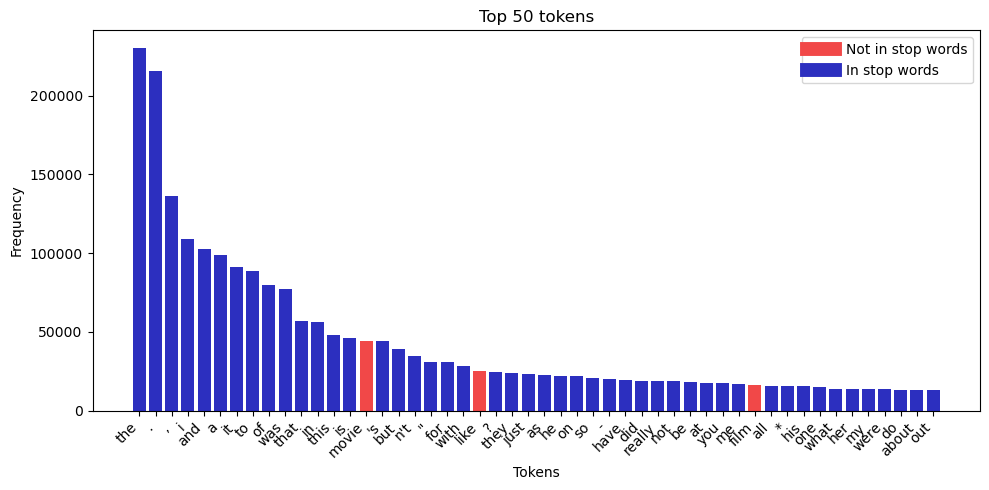

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

top_50_tok = OrderedDict(
    FreqDist(X_train['tokens'].explode()).most_common(50)
    )

tokens = list(top_50_tok.keys())
freq = list(top_50_tok.values())
extra_sw = [t for t in tokens if t not in stopword_list]
ax.bar(x=tokens, height=freq, color=['#f14848' if t in extra_sw else '#2c2fbf' for t in tokens])
ax.set_ylabel('Frequency', size=10)
ax.set_xlabel('Tokens', size=10)
ax.set_xticklabels(tokens, rotation=45, ha='right')
ax.set_title('Top 50 tokens')
custom_bars = [Line2D([0], [0], color='#f14848', lw=10), Line2D([0], [0], color='#2c2fbf', lw=10)]
ax.legend(custom_bars, ['Not in stop words', 'In stop words'], fontsize=10)
fig.set_facecolor('white');
plt.tight_layout()
# plt.savefig(f'./images/top_50_tokens', dpi=500)
plt.show()

The tokens **movie**, **like**, and **film** occur as frequently as many stop words. I'll add them to the stop word list. These words get thrown around so often in r/movies that they probably don't contribute much value in an ML context.

In [30]:
stopword_list.extend(["movie", "like", "film"])

#### Making tokens without stop words:

In [31]:
X_train['tokens_no_sw'] = X_train['tokens'].apply(
    lambda x: [t for t in x if t not in stopword_list]
)

Seeing most frequent tokens without stopwords:

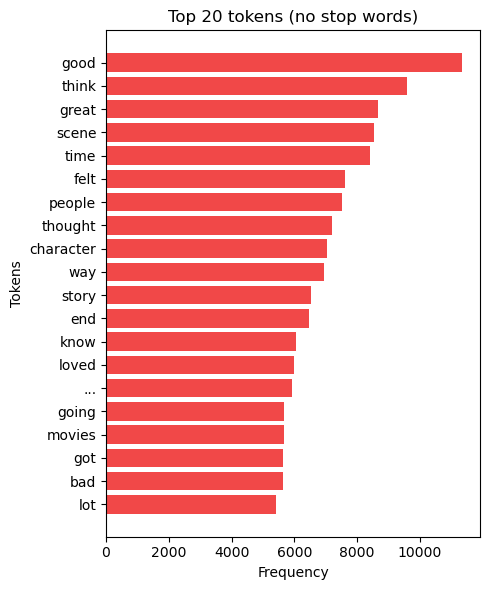

In [32]:
fig, ax = plt.subplots(figsize=(5,6))

top_20_tok = OrderedDict(
    FreqDist(X_train['tokens_no_sw'].explode()).most_common(20)
    )

tokens = list(top_20_tok.keys())[::-1]
freq = list(top_20_tok.values())[::-1]
ax.barh(y=tokens, width=freq, color='#f14848')
ax.set_ylabel('Tokens', size=10)
ax.set_xlabel('Frequency', size=10)
ax.set_title('Top 20 tokens (no stop words)')
fig.set_facecolor('white');
plt.tight_layout()
# plt.savefig(f'./images/top_20_tokens_no_sw', dpi=500)
plt.show()

Interesting that commenters used elipses ("...") often enough that it's in the top 20 tokens.

Previewing the restulting features:

In [33]:
X_train.sample(5)

,id,tconst,title,numVotes,runtimeMinutes,genres,comments,n_comments,spacy_comments,tokens,tokens_no_sw
10401,p3ztri,tt10366460,coda,124816,111.0,"Comedy,Drama,Music",[that scene between ruby and frank in the back of their truck as he 'listens' to her sing - what...,100,"[(that, scene, between, ruby, and, frank, in, the, back, of, their, truck, as, he, ', listens, '...","[that, scene, between, ruby, and, frank, in, the, back, of, their, truck, as, he, ', listens, ',...","[scene, ruby, frank, truck, listens, sing, brilliantly, acted, scene, excellent, heartwarming, l..."
62184,5ql91v,tt4385888,20th century women,45583,119.0,"Comedy,Drama",[i don't think it's possible to watch greta gerwig in anything and not immediately want to be be...,29,"[(i, do, n't, think, it, 's, possible, to, watch, greta, gerwig, in, anything, and, not, immedia...","[i, do, n't, think, it, 's, possible, to, watch, greta, gerwig, in, anything, and, not, immediat...","[think, possible, watch, greta, gerwig, immediately, want, best, friends, good, small, character..."
13621,nsj230,tt11084896,spirit untamed,3700,88.0,"Adventure,Animation,Comedy",[it's the same plot as every horse girl movie ever made but it looks like the video game that wo...,10,"[(it, 's, the, same, plot, as, every, horse, girl, movie, ever, made, but, it, looks, like, the,...","[it, 's, the, same, plot, as, every, horse, girl, movie, ever, made, but, it, looks, like, the, ...","[plot, horse, girl, looks, video, game, come, free, straight, dvd, barbie, early, 2000s, dreamwo..."
52723,7llz2i,tt5580390,the shape of water,415698,123.0,"Drama,Fantasy,Romance",[theres a thread that pops up here every once in a while about what people think is the best act...,93,"[(there, s, a, thread, that, pops, up, here, every, once, in, a, while, about, what, people, thi...","[there, s, a, thread, that, pops, up, here, every, once, in, a, while, about, what, people, thin...","[thread, pops, people, think, best, acting, scene, sally, hawkins, scene, begging, giles, help, ..."
43626,9n9qjv,tt6628394,bad times at the el royale,149216,141.0,"Crime,Drama,Mystery","[""how many people have you killed?"" ""123."" i had no idea he was gonna end up being my favorite c...",99,"[("", how, many, people, have, you, killed, ?, "", "", 123, ., "", i, had, no, idea, he, was, gon, n...","["", how, many, people, have, you, killed, ?, "", "", 123, ., "", i, had, no, idea, he, was, gon, na...","[people, killed, 123, idea, gon, na, end, favorite, character, jesus, christ, glad, face, bottle..."


### Further breaking down tokens
#### Lemmatization
Now I want to make a version of these tokenized comments where each word is lemmatized. __Lemmatization__ is a technique that uses grammatical context to convert a word into its root word, or "lemma," which is often its noun form. For example, the tool would change the words "running," "ran," and "runs" into "run."

Essentially I am another tokenizing function, where the output is lemmatized tokens instead of just plain tokens.

In [34]:
def spacy_lemmatize(list_of_docs):
    """
    Takes in a list of SpaCy documents.
    Converts them into one giant list of lemmas as strings.    
    """
    lemmas_by_doc = [[t.lemma_.lower() for t in doc] for doc in list_of_docs]
    lemmas_all_together = list(itertools.chain.from_iterable(lemmas_by_doc))
    return lemmas_all_together

In [35]:
X_train['lemmas'] = \
    X_train['spacy_comments'].apply(spacy_lemmatize)

In [36]:
# Check most common lemmas

FreqDist(X_train['lemmas'].explode()).most_common(20)

[('the', 229988),
 ('be', 220930),
 ('.', 215856),
 (',', 136561),
 ('i', 126201),
 ('and', 102868),
 ('a', 99050),
 ('it', 91234),
 ('to', 89984),
 ('of', 79666),
 ('that', 56669),
 ('in', 56053),
 ('not', 54934),
 ('movie', 50135),
 ('this', 48178),
 ('do', 42628),
 ('have', 40365),
 ('but', 39436),
 ('"', 31016),
 ('for', 30741)]

#### Lemmatized comments without stop words
In order to make the lemmatized tokens without stop words, I will also need to lemmatize the stop words.

This has to be done to the stop words while they are still within the string because SpaCy uses grammatical context to lemmatize.

In [37]:
stopword_list_lem = []

sw_lem_Series = \
    X_train['spacy_comments'].apply(
        lambda x: [[t.lemma_.lower() for t in doc if t.text.lower() in stopword_list] for doc in x]
    )

sw_lem_Series = sw_lem_Series.apply(lambda x: list(itertools.chain.from_iterable(x)))

for row in sw_lem_Series:
    stopword_list_lem.extend(row)

stopword_list_lem = list(set(stopword_list_lem))

In [38]:
# Lemmatized tokens, excluding stop words

X_train['lemmas_no_sw'] = X_train['lemmas'].apply(
    lambda x: [l for l in x if l not in stopword_list_lem]
    )

**Seeing most frequent lemmas without stopwords:**

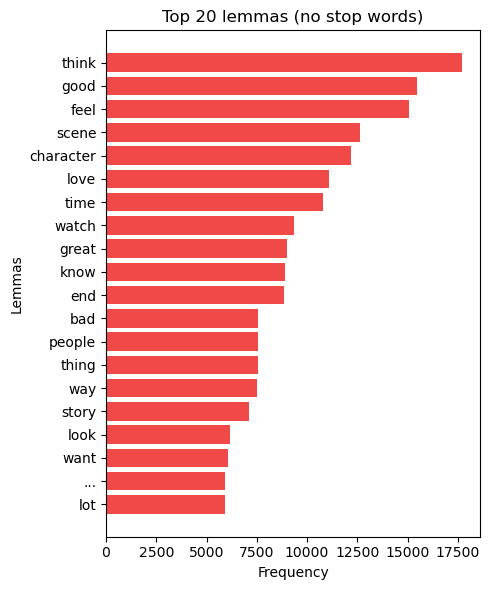

In [39]:
fig, ax = plt.subplots(figsize=(5,6))

top_20_lem = OrderedDict(
    FreqDist(X_train['lemmas_no_sw'].explode()).most_common(20)
    )

tokens = list(top_20_lem.keys())[::-1]
freq = list(top_20_lem.values())[::-1]
ax.barh(y=tokens, width=freq, color='#f14848')
ax.set_ylabel('Lemmas', size=10)
ax.set_xlabel('Frequency', size=10)
ax.set_title('Top 20 lemmas (no stop words)')
fig.set_facecolor('white');
plt.tight_layout()
# plt.savefig(f'./images/top_20_lemmas_no_sw', dpi=500)
plt.show()

#### Visualizing frequency distribution of tokens and lemmas for higher and lower IMDb scores:

In [40]:
print(f"Mean of y_train: {np.round(y_train.mean(), 2)}")
print(f"Median of y_train: {np.round(y_train.median(), 2)}")

Mean of y_train: 6.48
Median of y_train: 6.5


Artificially giving y_train two classes (for visualization purposes).

1: Above average

0: Below average

In [41]:
y_train_class = y_train.apply(lambda x: int(x > y_train.mean()))
y_train_class.head()

5057     1
2183     1
40719    1
2044     0
67123    0
Name: averageRating, dtype: int64

In [42]:
def plot_freqdict_classes(series, y, token_type='Tokens (unspecified kind))', cutoff=20):
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    fd_0 = FreqDist(series[y==0].explode()).most_common(cutoff)
    fd_0 = OrderedDict(fd_0)
    tokens_0 = list(fd_0.keys())[::-1]
    freq_0 = list(fd_0.values())[::-1]
    fd_1 = FreqDist(series[y==1].explode()).most_common(cutoff)
    fd_1 = OrderedDict(fd_1)
    tokens_1 = list(fd_1.keys())[::-1]
    freq_1 = list(fd_1.values())[::-1]
    shared_tokens = [t for t in tokens_0 if t in tokens_1]
    axes[0].barh(y=tokens_0, width=freq_0, color=['C6' if token in shared_tokens else 'C0' for token in tokens_0])
    axes[1].barh(y=tokens_1, width=freq_1, color=['C6' if token in shared_tokens else 'C0' for token in tokens_1])
    axes[0].set_ylabel('Tokens', size=10)
    axes[0].set_xlabel('Frequency', size=10)
    axes[1].set_xlabel('Frequency', size=10)
    fig.suptitle(f'Top {cutoff} {token_type}', size=15)
    axes[0].set_title('Below average IMDb Score')
    axes[1].set_title('Above average average IMDb Score')
    custom_bars = [Line2D([0], [0], color='C6', lw=10), Line2D([0], [0], color='C0', lw=10)]
    axes[0].legend(custom_bars, ['In common', 'Not in common'])
    axes[1].legend(custom_bars, ['In common', 'Not in common'])
    fig.set_facecolor('white');
    plt.tight_layout()
#     plt.savefig(f'./images/top_20_{series.name}', dpi=500)
    plt.show()


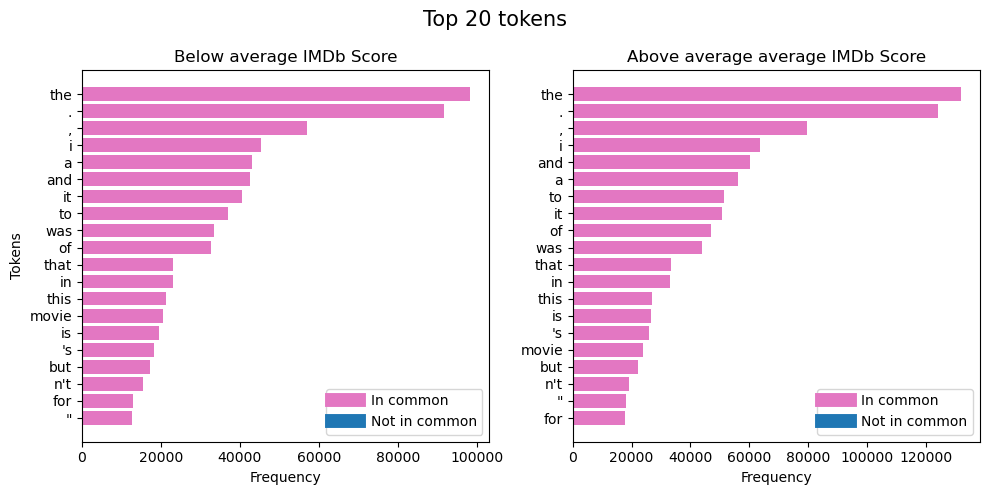

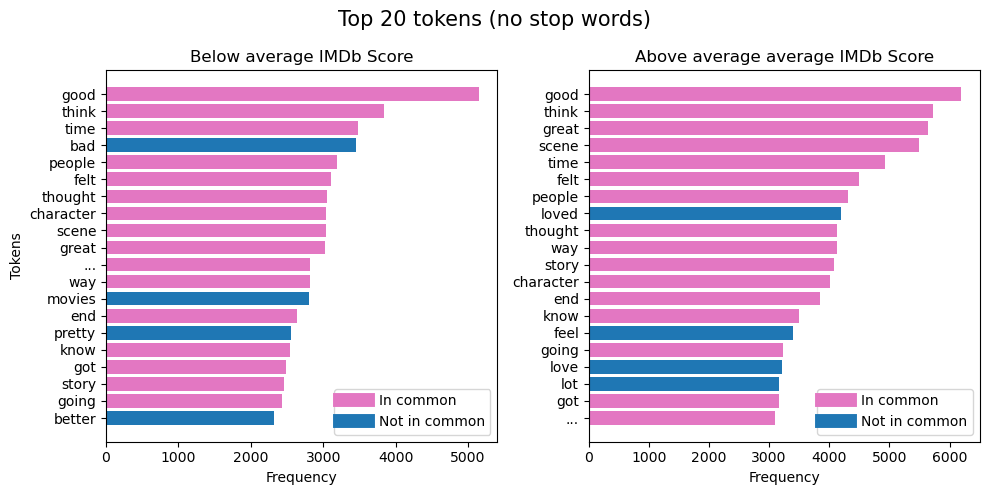

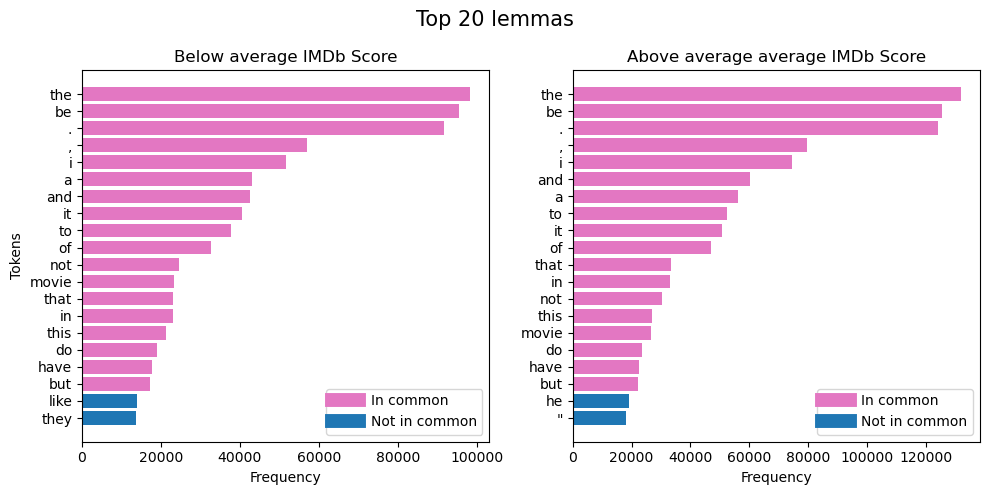

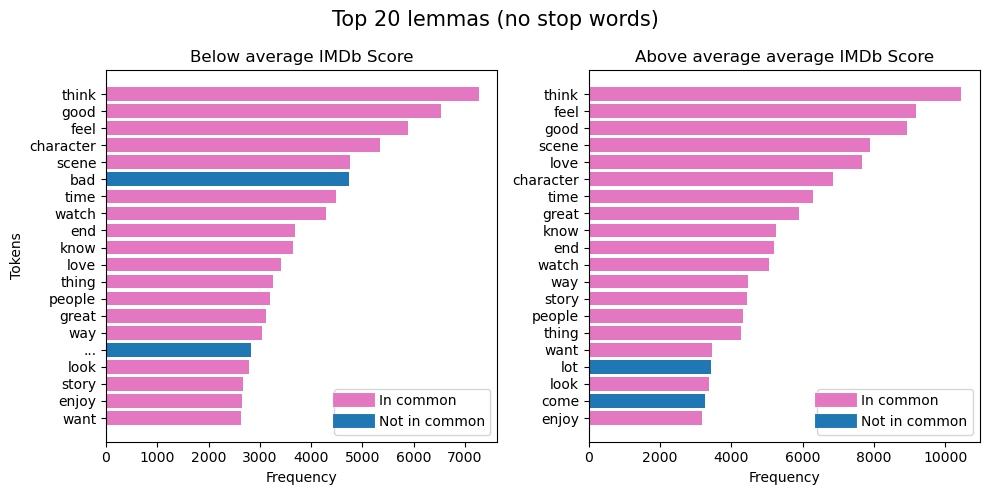

In [43]:
plot_freqdict_classes(X_train['tokens'], y_train_class, 'tokens')
plot_freqdict_classes(X_train['tokens_no_sw'], y_train_class, 'tokens (no stop words)')
plot_freqdict_classes(X_train['lemmas'], y_train_class, 'lemmas')
plot_freqdict_classes(X_train['lemmas_no_sw'], y_train_class, 'lemmas (no stop words)')

### More linguistic feature engineering
I will use the SpaCy library to extract more linguistic features from the comments.

### Vectorized part of speech (POS) tags
The SpaCy library is pre-trained to parse through sentences and identify each word's grammatical part of speech.

Here are some examples of what the tool can identify:

In [44]:
options_displacy_pos = {'compact':True, 'distance':90, 'bg':'#3056ff', 'color':'fff'}

for idx in [2, 5, 12]:
    print(example_comments[idx])
    displacy.render(nlp(example_comments[idx]), style='dep', jupyter=True, options=options_displacy_pos)

i can watch batman slowly walking to 4 piano notes all day


the whole scene with the riddler talking about "bruce wayne" had me hooked. i hope paul dano returns for the sequel.


that fight in the dark only being lit up by gunfire was absolutely incredible.


I plan to use this SpaCy capability in order to vectorize the universal [parts of speech](https://universaldependencies.org/u/pos/all.html) of each comment.

First, I'll convert each token into a string of its POS tag.

In [45]:
def spacy_pos(list_of_docs):
    """
    Takes in a list of SpaCy documents.
    Converts them into one giant list of POS tags as strings.    
    """
    pos_by_doc = [[t.pos_ for t in doc] for doc in list_of_docs]
    pos_all_together = list(itertools.chain.from_iterable(pos_by_doc))
    return pos_all_together

In [46]:
X_train['spacy_pos'] = X_train['spacy_comments'].apply(spacy_pos)

In [47]:
time_check()

Time check: 8 minutes and 7 seconds


In order to make the POS vectors, I'm using scikit-learn's CountVectorizer in a slightly unorthodox way. I'm using it to count POS tags rather than tokens.

In [48]:
# Making dataframes of vectorized POS tags

pos_vectorizer = CountVectorizer(tokenizer=spacy_pos, lowercase=False)
pos_vec_train = pos_vectorizer.fit_transform(X_train['spacy_comments'])
pos_vec_df_train = pd.DataFrame(
        pos_vec_train.toarray(),
        columns=pos_vectorizer.get_feature_names_out(),
        index=X_train.index
)

In [49]:
pos_vec_df_train.head()

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X
5057,516,542,457,421,230,584,9,1016,44,174,700,151,638,140,1,7,703,8
2183,483,468,314,342,182,457,7,906,61,132,572,153,543,107,5,8,571,9
40719,1032,1293,827,816,508,1274,10,2327,124,318,1454,160,1179,316,17,17,1587,13
2044,143,173,95,129,72,194,6,349,6,69,230,22,212,56,0,2,238,0
67123,1203,1318,1017,1192,560,1425,40,2543,132,511,1840,300,1690,373,1,18,1848,12


Changing this to the proportion of each POS within each Reddit thread.

In [50]:
pos_vec_df_norm_train = pos_vec_df_train.div(pos_vec_df_train.sum(axis=1), axis=0)
pos_vec_df_norm_train.columns = pos_vec_df_train.columns + '_norm'
pos_vec_df_norm_train.head()

,ADJ_norm,ADP_norm,ADV_norm,AUX_norm,CCONJ_norm,DET_norm,INTJ_norm,NOUN_norm,NUM_norm,PART_norm,PRON_norm,PROPN_norm,PUNCT_norm,SCONJ_norm,SPACE_norm,SYM_norm,VERB_norm,X_norm
5057,0.081375,0.085475,0.072071,0.066393,0.036272,0.092099,0.001419,0.160227,0.006939,0.027440,0.110393,0.023813,0.100615,0.022079,0.000158,0.001104,0.110866,0.001262
2183,0.090789,0.087970,0.059023,0.064286,0.034211,0.085902,0.001316,0.170301,0.011466,0.024812,0.107519,0.028759,0.102068,0.020113,0.000940,0.001504,0.107331,0.001692
40719,0.077758,0.097423,0.062312,0.061483,0.038276,0.095992,0.000753,0.175332,0.009343,0.023960,0.109554,0.012055,0.088834,0.023810,0.001281,0.001281,0.119575,0.000980
2044,0.071643,0.086673,0.047595,0.064629,0.036072,0.097194,0.003006,0.174850,0.003006,0.034569,0.115230,0.011022,0.106212,0.028056,0.000000,0.001002,0.119238,0.000000
67123,0.075080,0.082257,0.063471,0.074393,0.034950,0.088935,0.002496,0.158709,0.008238,0.031892,0.114835,0.018723,0.105473,0.023279,0.000062,0.001123,0.115334,0.000749


#### Checking for linear relationship between POS tags and IMDb score.

In [51]:
def get_pearson_r(X, y=y_train):
    return round(pearsonr(X, y_train)[0], 4)

def get_p(X, y=y_train):
    return pearsonr(X, y_train)[1]
    
def is_p_significant(X, y=y_train):
    return pearsonr(X, y_train)[1] < 0.05

POS_correlations =pd.DataFrame(
    pos_vec_df_norm_train.agg(
        [get_pearson_r, get_p, is_p_significant]
        )).T

POS_correlations

,get_pearson_r,get_p,is_p_significant
ADJ_norm,-0.0648,0.078811,False
ADP_norm,0.2941,0.0,True
ADV_norm,0.0022,0.95306,False
AUX_norm,-0.2642,0.0,True
CCONJ_norm,-0.002,0.955781,False
DET_norm,-0.1192,0.001185,True
INTJ_norm,-0.2105,0.0,True
NOUN_norm,0.0063,0.864935,False
NUM_norm,-0.1714,0.000003,True
PART_norm,-0.1444,0.000083,True


Pretty much all these relationships are weak, but I will still include at least the ones that have a significant relationship at a p-value of 0.05.

In [52]:
somewhat_significant_POS = \
    POS_correlations.query("is_p_significant == True").index.tolist()
somewhat_significant_POS

['ADP_norm',
 'AUX_norm',
 'DET_norm',
 'INTJ_norm',
 'NUM_norm',
 'PART_norm',
 'PROPN_norm',
 'SCONJ_norm',
 'SYM_norm']

In [53]:
pos_vec_df_norm_train = pos_vec_df_norm_train[somewhat_significant_POS]

## Meta-feature Engineering
To engineer more features, I'm going to use seemingly arbitrary information from each comment section. Here's the set of meta-features I plan to make:

* Number of comments per discussion
* Average character count of comment per discussion
* Average lemma length per discussion excluding stop words.
* Proportion of unique lemmas excluding stop words.

I drew inspiration for some of these features from [this Kaggle entry](https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook) by Gunes Evitan.

Making a new DataFrame composed of the meta-features I listed above:

In [54]:
meta_features_df_train = X_train[['n_comments']].copy()

# Average character count of comment per discussion
meta_features_df_train['avg_char_count_comments'] = \
    X_train['comments'].apply(lambda x: np.mean([len(comment) for comment in x]))

# Average lemma length per discussion excluding stop words.
meta_features_df_train['mean_lemma_length'] = \
    X_train['lemmas_no_sw'].apply(lambda x: np.mean([len(l) for l in x]))

# Proportion of unique lemmas excluding stop words.
meta_features_df_train['prop_unique_lemmas_no_sw'] = \
    X_train['lemmas_no_sw'].apply(lambda x: len(set(x))/len(x))

meta_features_df_train.head()

,n_comments,avg_char_count_comments,mean_lemma_length,prop_unique_lemmas_no_sw
5057,96,322.052083,6.072451,0.454383
2183,97,258.742268,5.465536,0.460233
40719,117,555.846154,5.931635,0.343349
2044,22,425.409091,5.678886,0.633431
67123,97,783.804124,5.731316,0.307252


#### Checking for linear relationship between POS tags and IMDb score.

In [55]:
pd.DataFrame(
    meta_features_df_train.agg(
        [get_pearson_r, get_p, is_p_significant]
        )).T

,get_pearson_r,get_p,is_p_significant
n_comments,0.1563,0.00002,True
avg_char_count_comments,0.1296,0.00042,True
mean_lemma_length,0.2981,0.0,True
prop_unique_lemmas_no_sw,-0.1593,0.000014,True


Again, these are pretty weak relationships, but in this case they're at least all significant.

I can visualize density plots for these meta-features, separated by the artificial classes I created earlier (below or above average IMDb score). The features `mean_lemma_length` and `prop_unique_lemmas_no_sw` appear to have a difference in distribution.

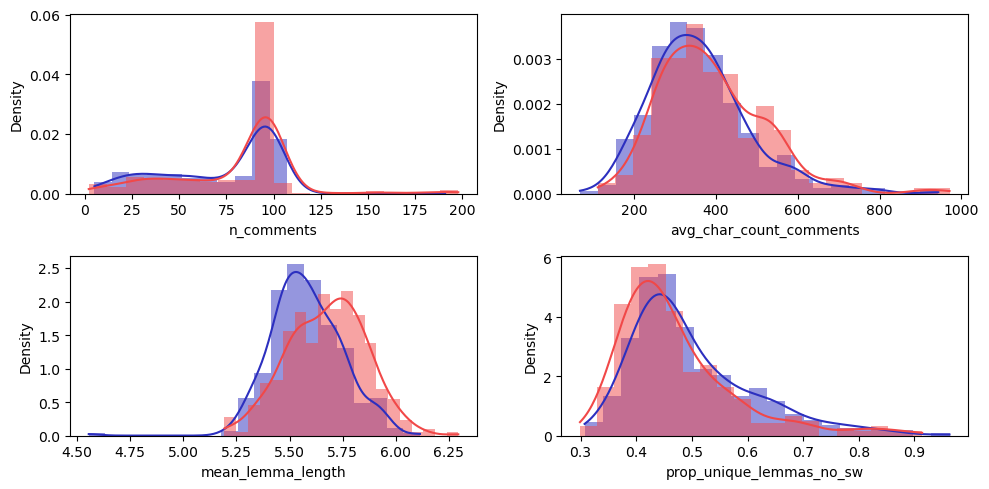

In [56]:
kwargs_histplot = {'kde':True, 'stat':"density", 'linewidth':0, 'bins':20}
color_below = '#2c2fbf'
color_above ='#f14848'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
fl_ax = axes.flatten()
fig.set_facecolor('white')
for idx, ftr in list(enumerate(meta_features_df_train.columns)):
    sns.histplot(meta_features_df_train[ftr][y_train_class==0], ax=fl_ax[idx], **kwargs_histplot, color=color_below)
    sns.histplot(meta_features_df_train[ftr][y_train_class==1], ax=fl_ax[idx], **kwargs_histplot, color=color_above)

plt.tight_layout()
# plt.savefig('./images/meta_features_basic.png', dpi=500)
plt.show()

In [57]:
time_check()

Time check: 8 minutes and 12 seconds


## Vectorizing the comment sections

I've engineered linguistic features and meta-features. Now I'm going to make the actual text of the comments interpretable by a machine learning model using [scikit-learn's TF-IDF vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). This vectorizer returns the [**term frequency-inverse document frequency**](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089) (TF-IDF) of each token in each movie comment section.

TF-IDF is a measurement that takes into account the 1) token's frequency within the document (term frequency) and 2) how rare it is for the token to appear in a document (inverse document frequency). 

I'm using the lemmatized version of comment sections with stop words removed.
<!-- Recall that this is the version that looked the most different between classes when I graphed token frequencies earlier. The vectorizer will return TF-IDF values for the top 500 frequently occurring lemmas across the "corpus" -- which is the collection of comment sections. -->

In [58]:
tfidf = TfidfVectorizer(
    tokenizer=spacy_lemmatize, 
    stop_words=stopword_list_lem,
    max_features=500,
    lowercase=False
    )

X_train_vec = tfidf.fit_transform(X_train['spacy_comments'])

X_train_vec_df = pd.DataFrame(
    X_train_vec.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=X_train.index
    )
X_train_vec_df.head()

,..,...,....,1,10,2,20,3,30,4,...,write,writer,writing,wrong,x200b,yeah,year,yes,young,…
5057,0.012916,0.017443,0.000000,0.000000,0.000000,0.019323,0.025910,0.042898,0.027672,0.000000,...,0.031502,0.000000,0.000000,0.000000,0.000000,0.000000,0.105084,0.013447,0.000000,0.07809
2183,0.015357,0.031110,0.015033,0.014039,0.000000,0.218277,0.030809,0.051008,0.000000,0.031729,...,0.049943,0.000000,0.030527,0.013796,0.000000,0.031531,0.062475,0.015989,0.106845,0.06964
40719,0.000000,0.020725,0.006009,0.033670,0.022479,0.032144,0.006157,0.005097,0.052608,0.006341,...,0.000000,0.000000,0.000000,0.005514,0.042835,0.000000,0.099888,0.012782,0.030505,0.00000
2044,0.000000,0.039720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023911,0.000000,0.000000,0.000000,0.000000,0.030193,0.019941,0.000000,0.029231,0.00000
67123,0.005183,0.063003,0.005074,0.023693,0.004745,0.023265,0.005199,0.004304,0.061081,0.000000,...,0.025285,0.005831,0.020607,0.018625,0.000000,0.031928,0.035145,0.016190,0.030911,0.00000


Finally, I'm going to combine the vectors with the other features I've engineered so far into a single DataFrame. All features are being scaled, as well.

**This is the DataFrame that the model will train on.**

In [59]:
X_train_combined_df = pd.concat(
    [
        X_train_vec_df,
        pos_vec_df_norm_train, 
        meta_features_df_train,
    ],
    axis=1
    )

# Scaling all features

scaler = StandardScaler()
X_train_combined_df_scaled = scaler.fit_transform(X_train_combined_df)
X_train_combined_df_scaled = pd.DataFrame(X_train_combined_df_scaled, index=X_train.index, columns=X_train_combined_df.columns)

X_train_combined_df_scaled.head()

,..,...,....,1,10,2,20,3,30,4,...,INTJ_norm,NUM_norm,PART_norm,PROPN_norm,SCONJ_norm,SYM_norm,n_comments,avg_char_count_comments,mean_lemma_length,prop_unique_lemmas_no_sw
5057,-0.138585,-1.092182,-0.635194,-0.774720,-0.881553,-0.353404,0.731085,1.009756,0.899491,-0.702503,...,-1.041463,-0.562030,-0.445390,-0.084493,-0.290374,-0.305112,0.614783,-0.426230,2.408155,-0.272459
2183,-0.040000,-0.774166,0.000811,-0.117426,-0.881553,6.346455,1.008651,1.373437,-0.621487,1.000058,...,-1.122686,0.923120,-1.163044,0.390703,-0.854367,0.212321,0.646747,-0.920188,-0.910538,-0.219001
40719,-0.660070,-1.015804,-0.380975,0.801650,0.425276,0.078331,-0.388255,-0.685442,2.270047,-0.362236,...,-1.563783,0.226606,-1.395618,-1.214119,0.206263,-0.076097,1.286035,1.397887,1.638156,-1.287016
2044,-0.660070,-0.573843,-0.635194,-0.774720,-0.881553,-1.004133,-0.737167,-0.914024,-0.621487,-0.702503,...,0.203159,-1.852239,1.500982,-1.313403,1.424650,-0.437012,-1.750581,0.380186,0.256089,1.363566
67123,-0.450782,-0.032097,-0.420528,0.334540,-0.605676,-0.220661,-0.442540,-0.721006,2.735795,-0.702503,...,-0.196582,-0.135831,0.769938,-0.573530,0.054061,-0.279930,0.646747,3.176468,0.542783,-1.616840


In [60]:
time_check()

Time check: 8 minutes and 18 seconds


#### Apply all pre-processing steps to test and validation sets.
The function below runs the `test` and `val` sets through the exact same preprocessing steps that the `train` set as undergone.

By default, the function makes use of the exact transformer objects that have been trained on `X_train`, in order to avoid data leakage.

In [61]:
def preprocess_comments(
    df_to_process,
    tokenizer=spacy_tokenize,
    stop_words=stopword_list,
    lem_tokenizer=spacy_lemmatize,
    stop_words_lem=stopword_list_lem,
    trained_pos_vectorizer=pos_vectorizer,
    trained_word_vectorizer=tfidf,
    trained_scaler=scaler,
    return_scaled=True,
    return_cleaned_df=False
):
    """
    Takes in a dataframe with a column named "comments", where each
    row contains a list of individual Reddit comments about a movie.
    All other parameters have default arguments set to specific
    tokenizers, vectorizers, and stop word lists. By default, this 
    function makes use of transformer objects that have been trained 
    on X_train in this notebook, in order to avoid data leakage. If 
    you are reusing this function in a different project, you should
    rewrite the function with your default arguments.

    SUMMARY OF ACTIONS:

    - Clean comments -- Remove URLs, make everything lowercase,
        standardize quotation marks and apostrophes, remove extra
        whitespace and newlines.
    - Convert lists of comments into lists of SpaCy documents.
    - Use SpaCy documents to tokenize comments.
    - Use SpaCy documents to lemmatize comoments.
    - Use SpaCy documents and a fitted Sklearn CountVectorizer 
        object to count and normalize part-of-speech tags; 
        create POS dataframe.
    - Calculate meta-features; create meta-features dataframe.
    - Vectorize lemmas or tokens using a fitted Sklearn 
        TfidfVectorizer object (TF-IDF vectorization).
    - Combine all features dataframes into one.
    - Scale resulting dataframe using a fitted Sklearn 
        StandardScaler.
    - If "return_cleaned_df" parameter set to True, returns
        a dictionary of both the features dataframe and the
        dataframe wit the cleaned and tokenized version of 
        the comments. Else, only returns features.
    """
    comments_df = df_to_process.copy()
    
    comments_df['comments'] = comments_df['comments'].apply(clean_comments)
    comments_df['spacy_comments'] = comments_df['comments'].apply(lambda x: list(nlp.pipe(x)))

    comments_df['tokens'] = comments_df['spacy_comments'].apply(tokenizer)
    comments_df['tokens_no_sw'] = \
        comments_df['tokens'].apply(lambda x: [t for t in x if t not in stop_words])

    comments_df['lemmas'] = comments_df['spacy_comments'].apply(lem_tokenizer)
    comments_df['lemmas_no_sw'] = \
        comments_df['lemmas'].apply(lambda x: [t for t in x if t not in stop_words_lem])

    pos_vec = trained_pos_vectorizer.transform(comments_df['spacy_comments'])
    pos_vec_df = pd.DataFrame(
        pos_vec.toarray(), 
        columns=trained_pos_vectorizer.get_feature_names_out(),
        index=df_to_process.index
    )
    pos_vec_df_norm = pos_vec_df.div(pos_vec_df.sum(axis=1), axis=0)
    pos_vec_df_norm.columns = pos_vec_df.columns + '_norm'
    pos_vec_df_norm = pos_vec_df_norm[somewhat_significant_POS]

    meta_features_df = comments_df[['n_comments']].copy()
    # Average character count of comment per discussion
    meta_features_df['avg_char_count_comments'] = \
        comments_df['comments'].apply(lambda x: np.mean([len(comment) for comment in x]))
    # Average lemma length per discussion. No stop words.
    meta_features_df['mean_lemma_length'] = \
        comments_df['lemmas_no_sw'].apply(lambda x: np.mean([len(l) for l in x]))
    # Proportion of unique lemmas. No stop words.
    meta_features_df['prop_unique_lemmas_no_sw'] = \
        comments_df['lemmas_no_sw'].apply(lambda x: len(set(x))/len(x))
    
    comments_vec = trained_word_vectorizer.transform(comments_df['spacy_comments'])
    comments_vec_df = pd.DataFrame(
        comments_vec.toarray(), 
        columns=trained_word_vectorizer.get_feature_names_out(),
        index=df_to_process.index
    )
    comments_combined_df = pd.concat(
        [
            comments_vec_df,
            pos_vec_df_norm,
            meta_features_df
        ],
        axis=1
    )
    comments_combined_df_scaled = trained_scaler.transform(comments_combined_df)
    comments_combined_df_scaled = pd.DataFrame(
        comments_combined_df_scaled, 
        index=df_to_process.index, 
        columns=comments_combined_df.columns
        )

    if return_scaled:
        if return_cleaned_df:
            return {'processed':comments_combined_df_scaled, 'cleaned':comments_df}
        else:
            return comments_combined_df_scaled
    else:
        if return_cleaned_df:
            return {'processed':comments_combined_df, 'cleaned':comments_df}
        else:
            return comments_combined_df

In [62]:
X_test_combined_df_scaled = preprocess_comments(X_test)
X_val_combined_df_scaled = preprocess_comments(X_val)

In [63]:
time_check()

Time check: 10 minutes and 5 seconds


## Modeling

In this section I'll begin using TensorFlow's Keras wrapper to make deep neural networks to predict movies' IMDb scores.

This will be an iterative process where I'll tweak various parameters and hyperparameters while monitoring each model's optimization and performance. Models will be judged based on performance with the validation dataset (X_val). 

I will use the rectified linear unit (ReLU) activation function in the input and hidden layers in order to induce non-linearity. ReLU is commonly cited is one of the more advanced activation functions.

I'm using the Adam algorithm to optimize each model, as it's [cited](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) as a more efficient alternative to stochastic gradient descent. The aim is to minimize the loss, which will be mean squared error. MSE measures the average of the square of the distance between predictions and true values. This is mainly to monitor for things like overfitting, underfitting, and convergence. Models will be configured to automatically stop when the loss on the validation set hasn't improved in 20 epochs.

Ultimately, however the model with the best R<sup>2</sup> score will be selected, given that there aren't over or underfitting issues. This is not necessarily the model with the lowest loss. R<sup>2</sup> indicates the proportion of the variability in the dependent variable that can be explained by the model.

After selecting a model, it will be given a final R<sup>2</sup> score using the test set (X_test).

### Note: Regression, assumptions, inferences, and predictions

Often, when predicting a continuous variable such as IMDb score, linear regression is used. This is a basic machine learning task that tries to find an optimal linear relationship between the predictors and the target. Linear regression stipulates several statistical assumptions such as independence of observations, homoscedasticity, no multicollinearity, and others. These assumptions are necessary when needing to make inferences about how individual predictors influence the target. However in a modeling context, there is less of a concern about making such inferences and [more of an emphasis on making accurate predictions](https://projecteuclid.org/journals/statistical-science/volume-16/issue-3/Statistical-Modeling--The-Two-Cultures-with-comments-and-a/10.1214/ss/1009213726.full). For that reason, I haven't checked for any of the assumptions for linear or non-linear regression. Considering how messy NLP is, I highly doubt this data would satisfy them. I am simply going to be interpreting and evaluation how well the models can predict a movie rating. 

### Baseline Model
The baseline model is a simple, untunedd linear regression model with scikit-learn.

In [64]:
baseline_lr = LinearRegression()
baseline_lr.fit(X_train_combined_df_scaled, y_train)

LinearRegression()

In [65]:
print("Baseline training loss (MSE):")
print(mean_squared_error(y_train, baseline_lr.predict(X_train_combined_df_scaled)))
print()
print("Baseline validation loss (MSE):")
print(mean_squared_error(y_val, baseline_lr.predict(X_val_combined_df_scaled)))

Baseline training loss (MSE):
0.06294277831192784

Baseline validation loss (MSE):
0.7154667281504817


In [66]:
print("Baseline training performance (R-squared):")
print(baseline_lr.score(X_train_combined_df_scaled, y_train))
print()
print("Baseline validation performance (R-squared):")
print(baseline_lr.score(X_val_combined_df_scaled, y_val))

Baseline training performance (R-squared):
0.9175501097555321

Baseline validation performance (R-squared):
0.22357361137304455


#### Baseline model validation results:
* Loss: 0.7155
* R<sup>2</sup>: 0.2236
* There is clear overfitting, and this is is a pretty low score; not much variance in the target is explained by the model.
___

In [67]:
# A function that  visualizes neural network performance

def plot_nn_curves(model_history):
    """
    Takes in the model history object from a fitted TensorFlow model. 
    Uses attributes from the history object to plot the training and 
    validation performance of model, according to the chosen loss
    functions and metrics.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
    fl_ax = axes.flatten()
    for idx, metric in enumerate(['loss', model_history.model.metrics_names[1]]):
        pair = [m for m in model_history.history.keys() if metric in m]
        fl_ax[idx].plot(model_history.history[pair[0]], label=metric)
        fl_ax[idx].plot(model_history.history[pair[1]], label=metric+'_val')
        fl_ax[idx].set_xlabel('epochs')
        fl_ax[idx].set_ylabel(metric)
        fl_ax[idx].set_title(f'{metric.upper()} Evaluation')
        fl_ax[idx].legend()
        plt.tight_layout();

In [68]:
# A function that returns loss and performance

def model_evaluation(
    model,
    pred_train=X_train_combined_df_scaled,
    target_train=y_train, 
    pred_val=X_val_combined_df_scaled,
    target_val=y_val
    ):
    train_preds = model.predict(pred_train, verbose=False)
    val_preds = model.predict(pred_val, verbose=False)
    print(f"{model.name} Evaluation:")
    print("*************** Loss (MSE) ****************")
    print(f"Training: {mean_squared_error(target_train, train_preds)}")
    print(f"Validation: {mean_squared_error(target_val, val_preds)}")
    print("********* Performance (R-squared) *********")
    print(f"Training: {r2_score(target_train, train_preds)}")
    print(f"Validation: {r2_score(target_val, val_preds)}")
    return ""

### Model 1
Single layer neural network

In [69]:
n_input = X_train_combined_df_scaled.shape[1]
n_input

513

Model_1 Evaluation:
*************** Loss (MSE) ****************
Training: 0.0005224978246942086
Validation: 0.9726271784689625
********* Performance (R-squared) *********
Training: 0.99931557059516
Validation: -0.05549759051863101



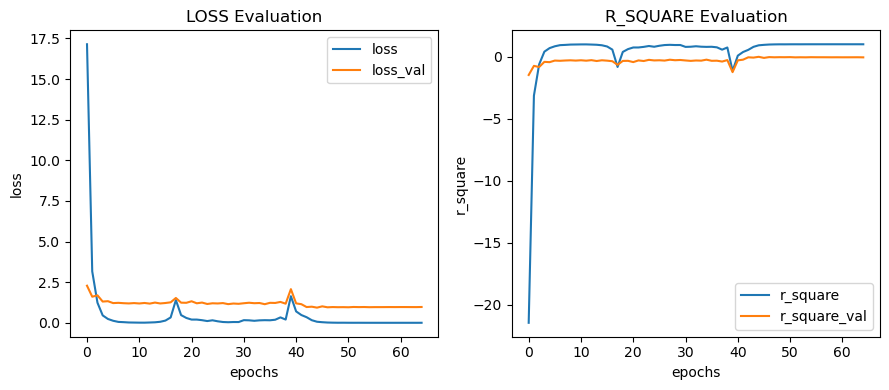

In [70]:
set_seed(seed)

m1 = models.Sequential(name="Model_1")

m1.add(layer=layers.Dense(
    units=n_input + 1,
    activation='relu',
    input_shape=(n_input,)
))

# m1.add(layer=layers.Dense(
#     units=150,
#     activation='relu',
#     ))

m1.add(layer=layers.Dense(
    units=1,
    activation='linear',
    ))

m1.compile(
    optimizer='Adam',
    loss='mse',
    metrics=[RSquare()]
    )

early_stopping = [
    EarlyStopping(monitor='val_loss', patience=20)
    ]

m1_hist = m1.fit(
    np.array(X_train_combined_df_scaled),
    y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_val_combined_df_scaled, y_val),
    verbose=False,
    callbacks=early_stopping
)

plot_nn_curves(m1_hist)
print(model_evaluation(m1))
# display(m1.evaluate(X_val_combined_df_scaled, y_val, return_dict=True))

#### Model 1 validation results
* Loss: 0.9726
* R<sup>2</sup>: -0.0555
* A negative R<sup>2</sup> is never a good sign. It means the model is wholly unsuited to predict the variable. It's essentially doing worse than a horizontal line, not to mention the baseline linear regression model.
* Based on the training and validation loss, the model is extremely overfit.
* Perhaps with how complex the nlp dataset is, this neural network wasn't complex enough to find a relationship between predictors and target.
___

### Model 2
Changes: 

In [71]:
# set_seed(seed)

# model = models.Sequential()

# model.add(layers.Dropout(0.2, input_shape=(n_input,)))

# model.add(layer=layers.Dense(
#     units=round(n_input/2),
#     activation='relu',
#     kernel_regularizer=regularizers.L2(0.05)
#     # input_shape=(n_input,)
# ))

# model.add(layers.Dropout(0.2))

# model.add(layer=layers.Dense(
#     units=round(n_input/4),
#     activation='relu',
#     kernel_regularizer=regularizers.L2(0.05)
# ))

# model.add(layers.Dropout(0.2))

# model.add(layer=layers.Dense(
#     units=1,
#     activation='linear',
#     ))

# model.compile(
#     optimizer='sgd',
#     loss='mean_absolute_error',
#     metrics=[RSquare()]
#     )

# early_stopping = [
#     EarlyStopping(monitor='val_loss', patience=10)
#     ]

# model_hist = model.fit(
#     np.array(X_train_combined_df_scaled),
#     y_train,
#     epochs=150,
#     batch_size=32,
#     validation_data=(X_val_combined_df_scaled, y_val),
#     verbose=False,
#     callbacks=early_stopping
# )

# plot_nn_curves(model_hist)
# print('Evaluation:')
# display(model.evaluate(X_val_combined_df_scaled, y_val, return_dict=True))
# print('R2:')
# display(r2_score(y_val, model.predict(X_val_combined_df_scaled)))

In [72]:
# set_seed(seed)

# model = models.Sequential()

# model.add(layers.Dropout(0.2, input_shape=(n_input,)))

# model.add(layer=layers.Dense(
#     units=round(n_input/2),
#     activation='relu',
#     kernel_regularizer=regularizers.L2()
#     # input_shape=(n_input,)
# ))

# model.add(layers.Dropout(0.2))

# model.add(layer=layers.Dense(
#     units=round(n_input/4),
#     activation='relu',
#     kernel_regularizer=regularizers.L2()
# ))

# model.add(layers.Dropout(0.2))

# model.add(layer=layers.Dense(
#     units=round(n_input/8),
#     activation='relu',
#     kernel_regularizer=regularizers.L2()
# ))

# model.add(layers.Dropout(0.2))

# model.add(layer=layers.Dense(
#     units=1,
#     activation='linear',
#     ))

# model.compile(
#     optimizer='sgd',
#     loss='mean_absolute_error',
#     metrics=[RSquare()]
#     )

# early_stopping = [
#     EarlyStopping(monitor='val_loss', patience=10)
#     ]

# model_hist = model.fit(
#     np.array(X_train_combined_df_scaled),
#     y_train,
#     epochs=150,
#     batch_size=32,
#     validation_data=(X_val_combined_df_scaled, y_val),
#     verbose=False,
#     callbacks=early_stopping
# )

# plot_nn_curves(model_hist)
# print('Evaluation:')
# display(model.evaluate(X_val_combined_df_scaled, y_val, return_dict=True))
# print('R2:')
# display(r2_score(y_val, model.predict(X_val_combined_df_scaled)))

In [73]:
#########################################

In [74]:
# import statsmodels.api as sm

In [75]:
# def reg_qq_sced(y, X, add_constant=True, qq=True, sced=True):
#     """
#     Display a the summary output of a linear regression model, with predictors X and target y.

#     Also displays a QQ plot and residual plot by default. These can be toggled off.
    
#     The function will add a constant to the predictors by default, and this can be toggled off.
#     """
#     # Run a linear regression and display the summary
#     if add_constant:
#         X_sm = sm.add_constant(X, has_constant='add')
#     else:
#         X_sm = X
#     model = sm.OLS(y, X_sm).fit()
#     display(model.summary())

#     # Display a QQ plot
#     if qq:
#         fig_qq = sm.graphics.qqplot(model.resid, line='45', fit=True,)
#         fig_qq.suptitle('QQ plot for residual normality check')
#     else:
#         pass

#     # Display a plot of predicted values vs. residuals
#     if sced:    
#         preds = model.predict(X_sm)
#         residuals = model.resid
#         fig_resid, ax = plt.subplots(figsize=(10,5))
#         fig_resid.suptitle('Predicted vs. residual plot for homoscedasticity check')
#         ax.scatter(preds, residuals, alpha=0.2)
#         ax.plot(preds, [0 for i in range(len(X_sm))])
#         ax.set_xlabel("Predicted Value")
#         ax.set_ylabel("Actual - Predicted Value");
#     else:
#         pass
#     print(f'Model adjusted R-squared: {model.rsquared_adj}')
#     print(f'Model RMSE: {np.sqrt(model.mse_resid)}')


In [76]:
# reg_qq_sced(y_train, X_train_combined_df_scaled)

In [85]:
# Total time:
time_check()

Time check: 36 minutes and 18 seconds
